In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib as plt

# MODEL DEVELOPMENT FROM THE LITERATURE
# Initial concentrations in mol/L 
CO_CA = 1.0      # Citric acid (Kolah et al., 2006)
CO_EtOH = 5.0    # Ethanol (Kolah et al., 2006)

# Equilibrium constants (Kolah et al., 2006)
K1 = 6.35   # CA + EtOH ⇌ ME + H2O
K2 = 2.72   # ME + EtOH ⇌ DE + H2O
K3 = 3.78   # DE + EtOH ⇌ TE + H2O

# SOLVING NON-LINEAR EQUATIONS
def equations(extents):
    xi1, xi2, xi3 = extents

    # Introducing equilibrium concentrations in terms of the extent of reaction
    CA = CO_CA - xi1
    EtOH = CO_EtOH - (xi1 + xi2 + xi3)
    MEC = xi1 - xi2
    DEC = xi2 - xi3
    TEC = xi3
    W = xi1 + xi2 + xi3

    # Equilibrium expressions for the stage esterification reaction
    eq1 = K1 - ((MEC * W) / (CA * EtOH))
    eq2 = K2 - ((DEC * W) / (MEC * EtOH))
    eq3 = K3 - ((TEC * W) / (DEC * EtOH))

    return [eq1, eq2, eq3]

# INITIAL GUESS
initial_guess = [0.5, 0.3, 0.2]  #  for the extents (ξ ranges from 0 - 1 )

# SOLVING THE EQUATIONS 
solution = fsolve(equations, initial_guess)
xi1, xi2, xi3 = solution

# FINAL CONCENTRATIONS 
CA = CO_CA - xi1
EtOH = CO_EtOH - (xi1 + xi2 + xi3)
MEC = xi1 - xi2
DEC = xi2 - xi3
TEC = xi3
W = xi1 + xi2 + xi3

# DISPLAYING THE RESULTS
print("Reaction Extents at Equilibrium:")
print('_'*50)
print(f"ξ1 = {xi1:.4f} mol/L")
print(f"ξ2 = {xi2:.4f} mol/L")
print(f"ξ3 = {xi3:.4f} mol/L\n")

print("Final Concentrations at Equilibrium (mol/L):")
print('_'*50)
print(f"CA   = {CA:.4f}")
print(f"EtOH = {EtOH:.4f}")
print(f"MEC   = {MEC:.4f}")
print(f"DEC   = {DEC:.4f}")
print(f"TEC   = {TEC:.4f}")
print(f"WaOH  = {W:.4f}")

Reaction Extents at Equilibrium:
__________________________________________________
ξ1 = 0.9864 mol/L
ξ2 = 0.9063 mol/L
ξ3 = 0.7047 mol/L

Final Concentrations at Equilibrium (mol/L):
__________________________________________________
CA   = 0.0136
EtOH = 2.4027
MEC   = 0.0801
DEC   = 0.2015
TEC   = 0.7047
WaOH  = 2.5973


In [2]:
# VALIDATION OF THE MODEL (K1, K2, K3, CA_i, and CEtOH_i from the literature)
# Component balance of the reaction system
print("Component balanace"); print('_'*70)
print("Initial concentration: 1+5  =", CA + EtOH + MEC + DEC + TEC + W); print()

print("K values validation"); print('_'*70)
K1 = ((xi1 - xi2) * (xi1 + xi2 + xi3)) / ((CO_CA - xi1) * (CO_EtOH - (xi1 + xi2 + xi3)))
K2 = ((xi2 - xi3) * (xi1 + xi2 + xi3)) / ((xi1 - xi2) * (CO_EtOH - (xi1 + xi2 + xi3)))
K3 = (xi3 * (xi1 + xi2 + xi3)) / ((xi2 - xi3) * (CO_EtOH - (xi1 + xi2 + xi3)))
print("K1 =", K1, "K2 =", K2, "K3 =", K3) 


Component balanace
______________________________________________________________________
Initial concentration: 1+5  = 6.0

K values validation
______________________________________________________________________
K1 = 6.3499999995085235 K2 = 2.7200000000135844 K3 = 3.779999999911022


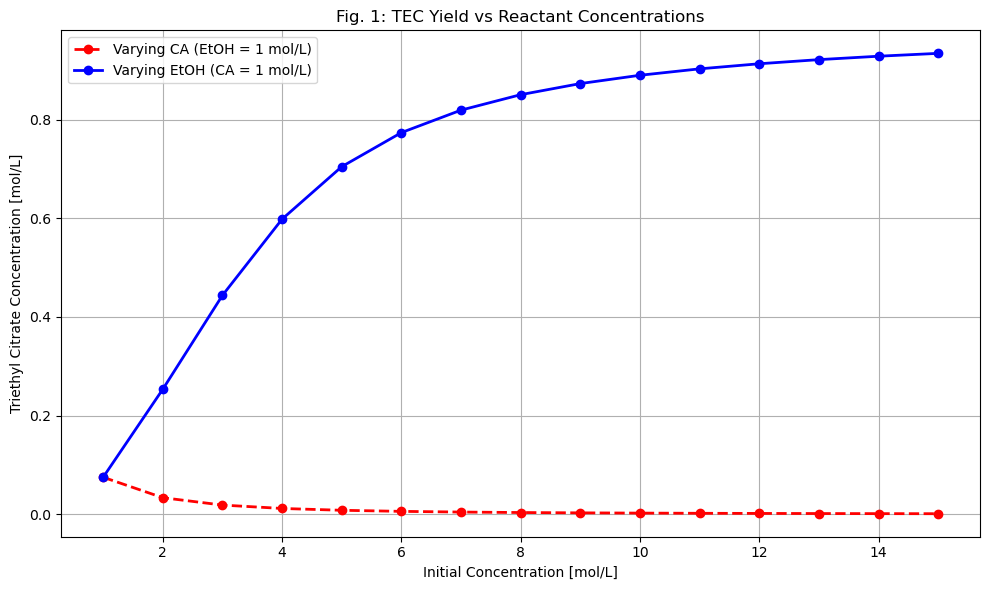

In [3]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Equilibrium constants (Kolah et al., 2006)
K1 = 6.35   # CA + EtOH ⇌ ME + H2O
K2 = 2.72   # ME + EtOH ⇌ DE + H2O
K3 = 3.78   # DE + EtOH ⇌ TE + H2O

# Function for solving the reaction system
def equations(extents, C0_CA, C0_EtOH):
    xi1, xi2, xi3 = extents
    CA = C0_CA - xi1
    EtOH = C0_EtOH - (xi1 + xi2 + xi3)
    ME = xi1 - xi2
    DE = xi2 - xi3
    TE = xi3
    H2O = xi1 + xi2 + xi3

    if min([CA, EtOH, ME, DE, H2O]) <= 0:    # Maintaining positive values
        return [1e6, 1e6, 1e6]

    eq1 = K1 - (ME * H2O) / (CA * EtOH)
    eq2 = K2 - (DE * H2O) / (ME * EtOH)
    eq3 = K3 - (TE * H2O) / (DE * EtOH)

    return [eq1, eq2, eq3]

#Fixed ethanol, varied citric acid (1,2...15)
C0_EtOH = 1.0 
CA_range = np.linspace(1, 15, 15) # Auto generation of range of values from 1 - 15 for citric acid
TE_CA = []
guess = [0.4, 0.3, 0.1]
# Iterating through the loop for the citric acid range and generating values
for C0_CA in CA_range: # iterating through the loop
    try:
        sol = fsolve(equations, guess, args=(C0_CA, C0_EtOH))
        xi1, xi2, xi3 = sol
        guess = sol
        TE_CA.append(max(xi3, 0)) # Collecting and storing values
    except:
        TE_CA.append(0)

# Fixed citric acid, varied ethanol (1,2...15)
C0_CA = 1.0
EtOH_range = np.linspace(1, 15, 15) # Auto generation of range of values from 1 - 15 for ethanol
TE_EtOH = []
guess = [0.4, 0.3, 0.2]

for C0_EtOH in EtOH_range: # iterating through the loop
    try:
        sol = fsolve(equations, guess, args=(C0_CA, C0_EtOH))
        xi1, xi2, xi3 = sol
        guess = sol
        TE_EtOH.append(max(xi3, 0)) # Collecting and storing values for TEC yield
    except:
        TE_EtOH.append(0)

# Visualizing the two plots on the same graph
plt.figure(figsize=(10, 6))
plt.plot(CA_range, TE_CA, 'ro--', label='Varying CA (EtOH = 1 mol/L)', linewidth=2, markersize=6)
plt.plot(EtOH_range, TE_EtOH, 'bo-', label='Varying EtOH (CA = 1 mol/L)', linewidth=2, markersize=6)
plt.xlabel('Initial Concentration [mol/L]')
plt.ylabel('Triethyl Citrate Concentration [mol/L]')
plt.title('Fig. 1: TEC Yield vs Reactant Concentrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
#Introducing pandas library to visualize the values in tabular form
import pandas as pd

# Equilibrium constants
K1 = 6.35
K2 = 2.72
K3 = 3.78

# Function for solving the reaction system
def equations(extents, C0_CA, C0_EtOH):
    xi1, xi2, xi3 = extents
    CA = C0_CA - xi1
    EtOH = C0_EtOH - (xi1 + xi2 + xi3)
    ME = xi1 - xi2
    DE = xi2 - xi3
    H2O = xi1 + xi2 + xi3  
    TE = xi3
    

    if min([CA, EtOH, ME, DE]) <= 0: # Avoiding non positive number
        return [1e6, 1e6, 1e6]

    eq1 = K1 - (ME * H2O) / (CA * EtOH)
    eq2 = K2 - (DE * H2O) / (ME * EtOH)
    eq3 = K3 - (TE * H2O) / (DE * EtOH)

    return [eq1, eq2, eq3]

# Case 1: Fixed ethanol, vary citric acid (1,2...15) and storing equilibrium concentrations and parameters
C0_EtOH = 1.0
CA_range = np.linspace(1, 15, 15)
TE_CA = []         # List to store TEC values at fixed citric acid
extents_CA = []    # List to store x1, x2, x3 
CA_vals = []       # List to store citric acid at equilibrium
EtOH_vals = []     # List to store ethanol
ME_vals = []       # List to store MEC 
DE_vals = []       # List to store DEC
H2O_vals = []      # List to store H20 values
TE_vals = []       # List to store TEC values
K1_vals = []       # List to store K1 values
K2_vals = []       # List to store K2 values
K3_vals = []       # List to store K3 values
guess = [0.4, 0.3, 0.1]

for C0_CA in CA_range:
    try:
        sol = fsolve(equations, guess, args=(C0_CA, C0_EtOH))
        xi1, xi2, xi3 = sol
        guess = sol
        CA = C0_CA - xi1
        EtOH = C0_EtOH - (xi1 + xi2 + xi3)
        ME = xi1 - xi2
        DE = xi2 - xi3
        H2O = xi1 + xi2 + xi3  
        TE = xi3
        
        # Collecting and storing values for the loop of the iterable concentrations of acid 
        TE_CA.append(max(TE, 0))
        extents_CA.append((xi1, xi2, xi3))
        CA_vals.append(CA)
        EtOH_vals.append(EtOH)
        ME_vals.append(ME)
        DE_vals.append(DE)
        H2O_vals.append(H2O)  
        TE_vals.append(TE)
        K1_vals.append(K1)  # Store K1 constant
        K2_vals.append(K2)  # Store K2 constant
        K3_vals.append(K3)  # Store K3 constant
    except:
        TE_CA.append(0)
        extents_CA.append((0, 0, 0))
        CA_vals.append(0)
        EtOH_vals.append(0)
        ME_vals.append(0)
        DE_vals.append(0)
        H2O_vals.append(0)  
        TE_vals.append(0)
        K1_vals.append(K1)  # Store K1 constant
        K2_vals.append(K2)  # Store K2 constant
        K3_vals.append(K3)  # Store K3 constant

# Case 2: Fixed citric acid, vary ethanol (1,2...15)
C0_CA = 1.0
EtOH_range = np.linspace(1, 15, 15)
TE_EtOH = []
extents_EtOH = []
CA_vals_EtOH = []
EtOH_vals_EtOH = []
ME_vals_EtOH = []
DE_vals_EtOH = []
H2O_vals_EtOH = [] 
TE_vals_EtOH = []
K1_vals_EtOH = []  # List to store K1 values
K2_vals_EtOH = []  # List to store K2 values
K3_vals_EtOH = []  # List to store K3 values
guess = [0.4, 0.3, 0.2]

#Iterating through the loop to calculate extents and equilibrium concentrations
for C0_EtOH in EtOH_range:
    try:
        sol = fsolve(equations, guess, args=(C0_CA, C0_EtOH))
        xi1, xi2, xi3 = sol
        guess = sol
        CA = C0_CA - xi1
        EtOH = C0_EtOH - (xi1 + xi2 + xi3)
        ME = xi1 - xi2
        DE = xi2 - xi3
        H2O = xi1 + xi2 + xi3  
        TE = xi3
        
        # Collecting and storing values
        TE_EtOH.append(max(TE, 0))
        extents_EtOH.append((xi1, xi2, xi3))
        CA_vals_EtOH.append(CA)
        EtOH_vals_EtOH.append(EtOH)
        ME_vals_EtOH.append(ME)
        DE_vals_EtOH.append(DE)
        H2O_vals_EtOH.append(H2O)  
        TE_vals_EtOH.append(TE)
        K1_vals_EtOH.append(K1)  # Store K1 constant
        K2_vals_EtOH.append(K2)  # Store K2 constant
        K3_vals_EtOH.append(K3)  # Store K3 constant
    except:
        TE_EtOH.append(0)
        extents_EtOH.append((0, 0, 0))
        CA_vals_EtOH.append(0)
        EtOH_vals_EtOH.append(0)
        ME_vals_EtOH.append(0)
        DE_vals_EtOH.append(0)
        H2O_vals_EtOH.append(0)  
        TE_vals_EtOH.append(0)
        K1_vals_EtOH.append(K1)  # Store K1 constant
        K2_vals_EtOH.append(K2)  # Store K2 constant
        K3_vals_EtOH.append(K3)  # Store K3 constant

# Creating DataFrames for both starting materials' equilibrium values
df_case1 = pd.DataFrame({         #Equilibrium values when acid is constant
    "CA (mol/L)": CA_range,
    "xi1": [ext[0] for ext in extents_CA],
    "xi2": [ext[1] for ext in extents_CA],
    "xi3": [ext[2] for ext in extents_CA],
    "CA Final (mol/L)": CA_vals,
    "EtOH Final (mol/L)": EtOH_vals,
    "ME (mol/L)": ME_vals,
    "DE (mol/L)": DE_vals,
    "H2O (mol/L)": H2O_vals,
    "TE (mol/L)": TE_vals,
    "K1": K1_vals,
    "K2": K2_vals,
    "K3": K3_vals
})

df_case2 = pd.DataFrame({                     #Equilibrium values when acid is constant
    "EtOH (mol/L)": EtOH_range,
    "xi1": [ext[0] for ext in extents_EtOH],
    "xi2": [ext[1] for ext in extents_EtOH],
    "xi3": [ext[2] for ext in extents_EtOH],
    "CA Final (mol/L)": CA_vals_EtOH,
    "EtOH Final (mol/L)": EtOH_vals_EtOH,
    "ME (mol/L)": ME_vals_EtOH,
    "DE (mol/L)": DE_vals_EtOH,
    "H2O (mol/L)": H2O_vals_EtOH,
    "TE (mol/L)": TE_vals_EtOH,
    "K1": K1_vals_EtOH,
    "K2": K2_vals_EtOH,
    "K3": K3_vals_EtOH
})



In [5]:
df_case1

,CA (mol/L),xi1,xi2,xi3,CA Final (mol/L),EtOH Final (mol/L),ME (mol/L),DE (mol/L),H2O (mol/L),TE (mol/L),K1,K2,K3
0,1.0,0.585703,0.216161,0.074969,0.414297,0.123167,0.369542,0.141192,0.876833,0.074969,6.35,2.72,3.78
1,2.0,0.744515,0.152908,0.033496,1.255485,0.069081,0.591607,0.119412,0.930919,0.033496,6.35,2.72,3.78
2,3.0,0.817801,0.115400,0.018556,2.182199,0.048244,0.702401,0.096844,0.951756,0.018556,6.35,2.72,3.78
3,4.0,0.859294,0.091978,0.011678,3.140706,0.037049,0.767316,0.080300,0.962951,0.011678,6.35,2.72,3.78
4,5.0,0.885736,0.076218,0.007991,4.114264,0.030054,0.809518,0.068227,0.969946,0.007991,6.35,2.72,3.78
5,6.0,0.903963,0.064966,0.005799,5.096037,0.025272,0.838997,0.059168,0.974728,0.005799,6.35,2.72,3.78
6,7.0,0.917249,0.056560,0.004394,6.082751,0.021797,0.860689,0.052166,0.978203,0.004394,6.35,2.72,3.78
7,8.0,0.927345,0.050054,0.003442,7.072655,0.019160,0.877291,0.046612,0.980840,0.003442,6.35,2.72,3.78
8,9.0,0.935267,0.044876,0.002767,8.064733,0.017090,0.890392,0.042108,0.982910,0.002767,6.35,2.72,3.78
9,10.0,0.941645,0.040660,0.002273,9.058355,0.015422,0.900986,0.038387,0.984578,0.002273,6.35,2.72,3.78


In [6]:
df_case2

,EtOH (mol/L),xi1,xi2,xi3,CA Final (mol/L),EtOH Final (mol/L),ME (mol/L),DE (mol/L),H2O (mol/L),TE (mol/L),K1,K2,K3
0,1.0,0.585703,0.216161,0.074969,0.414297,0.123167,0.369542,0.141192,0.876833,0.074969,6.35,2.72,3.78
1,2.0,0.817156,0.495643,0.253480,0.182844,0.433722,0.321512,0.242164,1.566278,0.253480,6.35,2.72,3.78
2,3.0,0.923547,0.706864,0.443808,0.076453,0.925782,0.216683,0.263056,2.074218,0.443808,6.35,2.72,3.78
3,4.0,0.968702,0.836726,0.598349,0.031298,1.596223,0.131976,0.238376,2.403777,0.598349,6.35,2.72,3.78
4,5.0,0.986364,0.906263,0.704721,0.013636,2.402652,0.080101,0.201542,2.597348,0.704721,6.35,2.72,3.78
5,6.0,0.993383,0.942352,0.773788,0.006617,3.290477,0.051030,0.168564,2.709523,0.773788,6.35,2.72,3.78
6,7.0,0.996427,0.961938,0.819341,0.003573,4.222294,0.034489,0.142597,2.777706,0.819341,6.35,2.72,3.78
7,8.0,0.997891,0.973319,0.850677,0.002109,5.178113,0.024572,0.122642,2.821887,0.850677,6.35,2.72,3.78
8,9.0,0.998664,0.980383,0.873207,0.001336,6.147745,0.018281,0.107176,2.852255,0.873207,6.35,2.72,3.78
9,10.0,0.999105,0.985022,0.890049,0.000895,7.125824,0.014083,0.094973,2.874176,0.890049,6.35,2.72,3.78
